# Variabili casuali {#sec-intro_random_var}

**Prerequisiti**

Prima di procedere con il presente capitolo, è essenziale leggere l'@sec-calculus.

**Concetti e competenze chiave**

- Definizione e comprensione delle variabili casuali discrete e continue, e delle loro distribuzioni di probabilità.
- Calcolo e interpretazione del valore atteso per variabili casuali discrete e continue.
- Calcolo e comprensione della varianza e della deviazione standard per variabili casuali discrete e continue.
- Applicazione di Python per calcolare metriche statistiche come valore atteso, varianza e deviazione standard.
- Analisi critica dei risultati calcolati, con particolare attenzione al loro significato statistico.

**Preparazione del Notebook**

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import itertools as it
import math
import random
import scipy.stats as stats
import arviz as az
import seaborn as sns
from collections import Counter

In [4]:
seed: int = sum(map(ord, "random_variables"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Introduzione {.unnumbered}

In questo capitolo, introdurremo il concetto di variabili casuali e delle loro distribuzioni di probabilità, ampliando ulteriormente l'ambito delle analisi matematiche degli eventi considerati finora. Le variabili casuali possono essere discrete o continue, a seconda dei valori che possono assumere. Iniziamo con una definizione.

::: {#def-}
Una variabile casuale reale è una funzione che associa gli esiti possibili di un esperimento (lo spazio campionario $\Omega$) a valori numerici reali. Matematicamente, si descrive come $X : \Omega \rightarrow \mathbb{R}$, dove $X$ è la variabile casuale e $\mathbb{R}$ rappresenta l'insieme dei numeri reali.
:::

Le variabili casuali si dividono in due categorie principali:

- **Discrete**: Queste variabili possono assumere solo un numero limitato di valori distinti e contabili. Un esempio è il numero di libri letti in un mese.
- **Continue**: Queste variabili possono assumere qualsiasi valore in un intervallo. Un esempio è la temperatura di un giorno, che può variare continuamente e assumere un numero infinito di valori all'interno di un dato range.

::: {#exm-1}
Consideriamo l'esperimento casuale del lancio di una moneta. Ogni volta che lanciamo la moneta, otteniamo un risultato specifico: testa o croce. Questi risultati sono gli esiti reali che possiamo osservare. In matematica e statistica, ci interessa analizzare tutti i possibili risultati in modo strutturato. Le variabili casuali ci permettono di trasformare questi esiti in valori numerici utilizzabili nei calcoli; per esempio, possiamo assegnare il numero 1 a testa e il numero 0 a croce.
:::

::: {#exm-2}
Un altro esempio è la variabile casuale $Y$ che rappresenta il risultato di un lancio di dado. Se definiamo $Y = 1$ per indicare che il risultato del lancio è un numero dispari (1, 3 o 5) e $Y = 0$ per indicare che il risultato del lancio è un numero pari (2, 4 o 6), abbiamo trasformato un'osservazione fisica (il lancio del dado) in un valore numerico che rappresenta un certo tipo di evento.
:::

Questo processo di assegnazione di numeri a stati semplifica notevolmente l'analisi dei dati, permettendoci di applicare concetti matematici e statistici agli eventi del mondo reale. In generale, le variabili casuali vengono utilizzate principalmente in due modi:

1. **Modellazione delle conoscenze (osservazioni)**: Le variabili casuali aiutano a quantificare e strutturare le informazioni raccolte da esperimenti o studi.
2. **Modellazione delle incognite (variabili latenti, parametri, predizioni)**: Le variabili casuali rappresentano ciò che non sappiamo o che vogliamo prevedere, come i parametri nascosti di un modello o i futuri esiti di un esperimento.

In sintesi, le variabili casuali ci permettono di modellare e analizzare matematicamente la complessità e l'incertezza del mondo reale, fornendo un ponte tra le osservazioni empiriche e la teoria statistica.

### Convenzioni Notazionali

Nella teoria della probabilità, è usuale adottare una specifica convenzione di notazione per le variabili casuali e i loro esiti. Comunemente, si utilizzano le lettere maiuscole, come 'X', per indicare una variabile casuale, ovvero un concetto che rappresenta una serie di possibili esiti di un fenomeno aleatorio. D'altro canto, la corrispondente lettera minuscola, 'x' nel nostro esempio, è impiegata per denotare una specifica realizzazione o un esito particolare che la variabile casuale può assumere. Questa distinzione aiuta a chiarire se si sta parlando della variabile casuale nel suo insieme (X) o di un suo specifico valore (x).

Ulteriori convenzioni di notazione includono:

- 'X' è spesso usata per rappresentare variabili casuali non osservate, come parametri sconosciuti o variabili latenti di un modello.
- 'Y', al contrario, è generalmente riservata a variabili casuali osservate, ovvero dati che sono stati effettivamente raccolti o misurati in un esperimento

## Variabili casuali multiple

Nella teoria della probabilità, le variabili casuali spesso non operano in isolamento ma in contesti dove interagiscono o si combinano tra loro. Per esemplificare, immaginiamo di avere una moneta perfettamente bilanciata e di decidere di lanciarla tre volte. Ogni lancio di questa moneta può essere descritto da una variabile casuale separata: $Y_1$, $Y_2$, e $Y_3$. Queste variabili rappresentano i risultati dei lanci individuali, e ogni lancio è considerato indipendente dagli altri. Ciò significa che l'esito di un lancio non influisce sugli esiti degli altri. Poiché la moneta è bilanciata, la probabilità di ottenere testa (che possiamo rappresentare come 1) o croce (rappresentata come 0) in ogni lancio è del 50%, dunque abbiamo $P(Y_n = 1) = 0.5$ e $P(Y_n = 0) = 0.5$, per $n$ uguale a 1, 2 o 3.

Quando combiniamo variabili casuali attraverso operazioni aritmetiche, possiamo creare nuove variabili che offrono ulteriori insight. Prendiamo, per esempio, i tre lanci della moneta bilanciata menzionati prima. Se definiamo $Y_1$, $Y_2$, e $Y_3$ come i risultati di questi lanci, possiamo introdurre una nuova variabile casuale $Z$ che rappresenta la somma dei risultati:

$$
Z = Y_1 + Y_2 + Y_3.
$$

La variabile $Z$ è un esempio di variabile casuale discreta, il che significa che può assumere solo valori interi specifici. A differenza delle variabili continue che possono assumere qualsiasi valore in un intervallo, $Z$ può solo risultare in una serie limitata di numeri interi, che nel contesto dei nostri lanci di moneta sono i possibili totali di testa ottenuti nei tre tentativi. La notazione $\mathbb{Z}$ qui è un po' fuorviante poiché sembra riferirsi all'insieme di tutti i numeri interi, ma nel contesto specifico di $Z$ come somma dei risultati di tre lanci di moneta, i valori possibili di $Z$ vanno da 0 (nessun testa in tre lanci) a 3 (testa in tutti e tre i lanci), rendendo $Z$ una variabile che riflette il numero totale di testa ottenuti.

## Distribuzione di Probabilità {#sec-fun-mass-prob}

Il concetto di distribuzione di probabilità è fondamentale per analizzare come le probabilità si distribuiscono tra i vari esiti possibili di una variabile casuale. Questo concetto varia a seconda che stiamo considerando variabili casuali discrete o continue.

### Variabili Casuali Discrete

Per le variabili casuali discrete, che assumono valori specifici e contabili (come il lancio di un dado), la distribuzione di probabilità è rappresentata dalla cosiddetta funzione di massa di probabilità, spesso abbreviata con $P(\cdot)$. Questa funzione attribuisce una probabilità precisa a ciascun esito possibile della variabile. Prendendo l'esempio del lancio di un dado equilibrato, se ci concentriamo sul risultato "1", la funzione di massa di probabilità potrebbe esprimersi come $P(Y = 1) = \frac{1}{6}$, indicando che, in una serie di lanci indipendenti, il risultato "1" si verificherebbe circa un sesto delle volte. Qui, la probabilità può essere interpretata in due modi principali: come una misura di credenza nella teoria bayesiana o come una frequenza di occorrenza a lungo termine nell'approccio frequentista.

### Variabili Casuali Continue

Nel caso delle variabili casuali continue, che possono assumere un'infinità di valori all'interno di un intervallo, si parla di densità di probabilità, indicata con $p(\cdot)$. Questa funzione non assegna probabilità a valori puntuali (dato che la probabilità di un singolo esatto valore è zero), ma determina la probabilità che la variabile si collochi entro un certo intervallo di valori.

### Supporto della Variabile Casuale

Il concetto di supporto di una variabile casuale si riferisce all'insieme di tutti i valori che la variabile può effettivamente assumere. Per esempio, il supporto di un dado standard a sei facce è l'insieme $\{1, 2, 3, 4, 5, 6\}$, mentre per una variabile casuale che segue una distribuzione continua, come quella gaussiana, il supporto potrebbe essere l'intero insieme dei numeri reali.

### Assegnazione di Probabilità

Per le variabili casuali discrete, è essenziale specificare la probabilità di ogni valore possibile per definire la loro distribuzione di probabilità in modo completo. Per le variabili continue, invece, ci affidiamo alla densità di probabilità per capire la probabilità che la variabile rientri in specifici intervalli di valori.

In conclusione, la distribuzione di probabilità, rappresentata attraverso la funzione di massa di probabilità per le variabili discrete o la densità di probabilità per quelle continue, è cruciale per descrivere il modo in cui le probabilità si distribuiscono tra i diversi esiti possibili di una variabile casuale, offrendo una visione completa del suo comportamento.

::: {#exm-}
Supponiamo che la variabile casuale discreta $X$ per il tipo di sangue sia definita esplicitamente come segue:

$$ 
X = 
\begin{cases} 
1 & \text{se la persona ha il tipo di sangue A} \\
2 & \text{se la persona ha il tipo di sangue B} \\
3 & \text{se la persona ha il tipo di sangue AB} \\
4 & \text{se la persona ha il tipo di sangue O}
\end{cases}
$$

Pertanto, $X$ è una variabile casuale discreta con quattro possibili esiti. Possiamo anche trovare la distribuzione di probabilità che descrive la probabilità dei diversi valori possibili della variabile casuale $X$. Notiamo che gli assiomi e le proprietà delle probabilità che abbiamo discusso in precedenza si applicano anche alle variabili casuali (ad esempio, la probabilità totale per tutti i valori possibili di una variabile casuale è pari a uno).

Le distribuzioni di probabilità sono spesso presentate utilizzando tabelle di probabilità o grafici. Ad esempio, supponiamo che le probabilità individuali per i diversi tipi di sangue in una popolazione siano $P(A) = 0.41$, $P(B) = 0.10$, $P(AB) = 0.04$, e $P(O) = 0.45$. Notiamo che: 

$$ P(A) + P(B) + P(AB) + P(O) = 0.41 + 0.10 + 0.04 + 0.45 = 1. $$

| Tipo di sangue | A   | B   | AB  | O   |
|----------------|-----|-----|-----|-----|
| $X$            | 1   | 2   | 3   | 4   |
| $P(X)$         | 0.41| 0.10| 0.04| 0.45|

Qui, $x$ denota un valore specifico (cioè 1, 2, 3 o 4) della variabile casuale $X$. Quindi, invece di dire $P(A) = 0.41$, cioè il tipo di sangue è A con probabilità 0.41, possiamo dire che $P(X = 1) = 0.41$, cioè $X$ è uguale a 1 con probabilità 0.41.

Possiamo usare la distribuzione di probabilità per rispondere a domande di probabilità. Ad esempio, qual è la probabilità che una persona selezionata a caso dalla popolazione possa donare sangue a qualcuno con tipo di sangue B?

Sappiamo che le persone con tipo di sangue B o O possono donare a una persona con tipo di sangue B.

Pertanto, dobbiamo trovare la probabilità $P(\text{tipo di sangue B} \cup \text{tipo di sangue O})$. Poiché gli eventi tipo di sangue B e tipo di sangue O sono mutuamente esclusivi, possiamo usare la regola dell'addizione per eventi mutuamente esclusivi per ottenere:

$$ P(\text{B} \cup \text{O}) = P(B) + P(O) = 0.10 + 0.45 = 0.55 $$

Quindi, c'è una probabilità del 55% che una persona selezionata a caso nella nostra popolazione possa donare sangue a qualcuno con tipo di sangue B.
:::

::: {#exm-}
Immaginiamo di lanciare due dadi equilibrati, ciascuno con sei facce. Definiamo una variabile casuale discreta $Z$, che rappresenta la somma dei valori ottenuti in ciascun lancio dei dadi. Indichiamo con $D_1$ il risultato del primo dado e con $D_2$ quello del secondo dado, quindi $Z = D_1 + D_2$.

Per analizzare questa variabile casuale, dobbiamo prima costruire lo spazio campionario associato all'esperimento. Lo spazio campionario in questo caso è l'insieme di tutte le possibili combinazioni dei risultati dei due lanci di dado. Dato che ogni dado ha sei facce, ci sono in totale $6 \times 6 = 36$ possibili esiti.

Ogni esito può essere rappresentato come una coppia ordinata (i, j), dove i e j sono i risultati dei dadi $D_1$ e $D_2$, rispettivamente. Quindi, lo spazio campionario può essere descritto come ${(1,1), (1,2), (1,3), \dots, (6,4), (6,5), (6,6)}$.

In [13]:
r = range(1, 7)
sample = [(i, j) for i in r for j in r]
print(sample)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


In [5]:
elements_per_row = 6

for i in range(0, len(sample), elements_per_row):
    print(sample[i:i+elements_per_row])


[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)]
[(2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6)]
[(3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6)]
[(4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6)]
[(5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6)]
[(6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


Le sequenze come (1, 1), (1, 2), ecc. sono gli eventi elementari di questo esperimento casuale. Lo spazio campione di questo esperimento casuale è costituito da 36 eventi elementari:

In [4]:
len(sample)

36

Per ogni possibile combinazione (i, j) risultante dal lancio dei due dadi, la variabile casuale $Z$ assume un valore che corrisponde alla somma dei numeri i e j. Ad esempio, se i risultati dei dadi sono 3 e 4, allora $Z = 3 + 4 = 7$. Pertanto, il valore di $Z$ può variare da un minimo di 2 (ottenuto dal lancio di due 1) fino a un massimo di 12 (ottenuto dal lancio di due 6), coprendo così tutti i possibili risultati della somma dei due dadi. La distribuzione di $Z$ ci offre una panoramica sulle probabilità associate a ogni possibile somma risultante.

È importante sottolineare che l'evento $Z = u$, dove $u$ è un valore compreso tra 2 e 12, rappresenta un "evento composto". Ciò significa che può essere formato da più di un "evento elementare". Ad esempio, l'evento $Z = 2$ corrisponde esclusivamente all'evento elementare (1, 1), mentre l'evento $Z = 3$ è il risultato di due eventi elementari differenti: (1, 2) e (2, 1). La stessa logica si applica agli altri valori di $Z$, dove il numero di eventi elementari che contribuiscono a un dato evento composto $Z = u$ aumenta all'aumentare del valore di $u$. Questa caratteristica della distribuzione di $Z$ è fondamentale per comprendere e calcolare le probabilità associate ai diversi totali possibili nella somma dei due dadi.

Nel nostro esempio costruito usando Python, ogni elemento della lista `sample` è una lista di due elementi. Per trovare il valore della variabile casuale $Z$, quindi, dobbiamo sommare i due elementi di ciascuna lista. Nel primo punto campione (1, 1), il valore di $Z$ è 2:

In [6]:
sum(sample[0])

2

In corrispondenza dell'ultimo punto dello spazio campione (6, 6), il valore di $Z$ è 12:

In [7]:
sum(sample[35])

12

Creiamo ora la lista `z` che memorizza il valore assunto dalla variabile casuale $Z$ in corrispondenza di ciascun punto dello spazio campione:

In [8]:
r = range(1, 7)
sample = [(i, j) for i in r for j in r]
z = [sum(point) for point in sample]

# Arrange and print `z` in a format with 6 elements per row to reflect a 6x6 sample space
elements_per_row = 6
formatted_output = [z[i:i+elements_per_row] for i in range(0, len(z), elements_per_row)]

formatted_output

[[2, 3, 4, 5, 6, 7],
 [3, 4, 5, 6, 7, 8],
 [4, 5, 6, 7, 8, 9],
 [5, 6, 7, 8, 9, 10],
 [6, 7, 8, 9, 10, 11],
 [7, 8, 9, 10, 11, 12]]

Contiamo dunque quante volte si presenta ciascun possibile valore $Z$ nello spazio campione. 

In [10]:
# Inizializzo un dizionario per memorizzare le frequenze di ciascun valore di Z
frequenze_z = {}

# Calcolo le frequenze per ciascun valore di Z
for valore in z:
    if valore in frequenze_z:
        frequenze_z[valore] += 1
    else:
        frequenze_z[valore] = 1

frequenze_z

{2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}

I valori di probabilità per ciascun valore di $z$ sono calcolati in base alla frequenza con cui quel particolare valore di $z$ emerge all'interno dell'intero insieme dei risultati. In altre parole, per ogni valore $z$, la probabilità corrispondente è determinata dalla proporzione di occorrenze di quel valore $z$ nell'elenco dei risultati prodotti dall'esperimento casuale. Questo elenco rappresenta tutti i possibili valori che la variabile casuale $Z$ può assumere, calcolati per ogni combinazione di punti nello spazio campionario dell'esperimento.

Costruiamo ora la distribuzione di massa di probabilità per la variabile casuale $Z$. La probabilità di ciascun valore di $Z$ si trova dividendo la sua frequenza per il numero totale di esiti nello spazio campione.

In [13]:
# Calcoliamo il numero totale di esiti nello spazio campione
numero_totale_esiti = len(z)

# Inizializzo un dizionario per memorizzare la distribuzione di massa di probabilità di Z
distribuzione_massa_probabilita = {}

# Calcolo della distribuzione di massa di probabilità per ciascun valore di Z
for valore, frequenza in frequenze_z.items():
    distribuzione_massa_probabilita[valore] = frequenza / numero_totale_esiti

distribuzione_massa_probabilita

{2: 0.027777777777777776,
 3: 0.05555555555555555,
 4: 0.08333333333333333,
 5: 0.1111111111111111,
 6: 0.1388888888888889,
 7: 0.16666666666666666,
 8: 0.1388888888888889,
 9: 0.1111111111111111,
 10: 0.08333333333333333,
 11: 0.05555555555555555,
 12: 0.027777777777777776}

Creiamo un DataFrame con due colonne: i valori di Z e le associate probabilità.

In [14]:
df_distribuzione = pd.DataFrame(list(distribuzione_massa_probabilita.items()), columns=['Valore di Z', 'Probabilità'])

df_distribuzione

,Valore di Z,Probabilità
0,2,0.027778
1,3,0.055556
2,4,0.083333
3,5,0.111111
4,6,0.138889
5,7,0.166667
6,8,0.138889
7,9,0.111111
8,10,0.083333
9,11,0.055556


Possiamo usare un un grafico a barre per rappresentare la distribuzione di probabilità di $Z$.

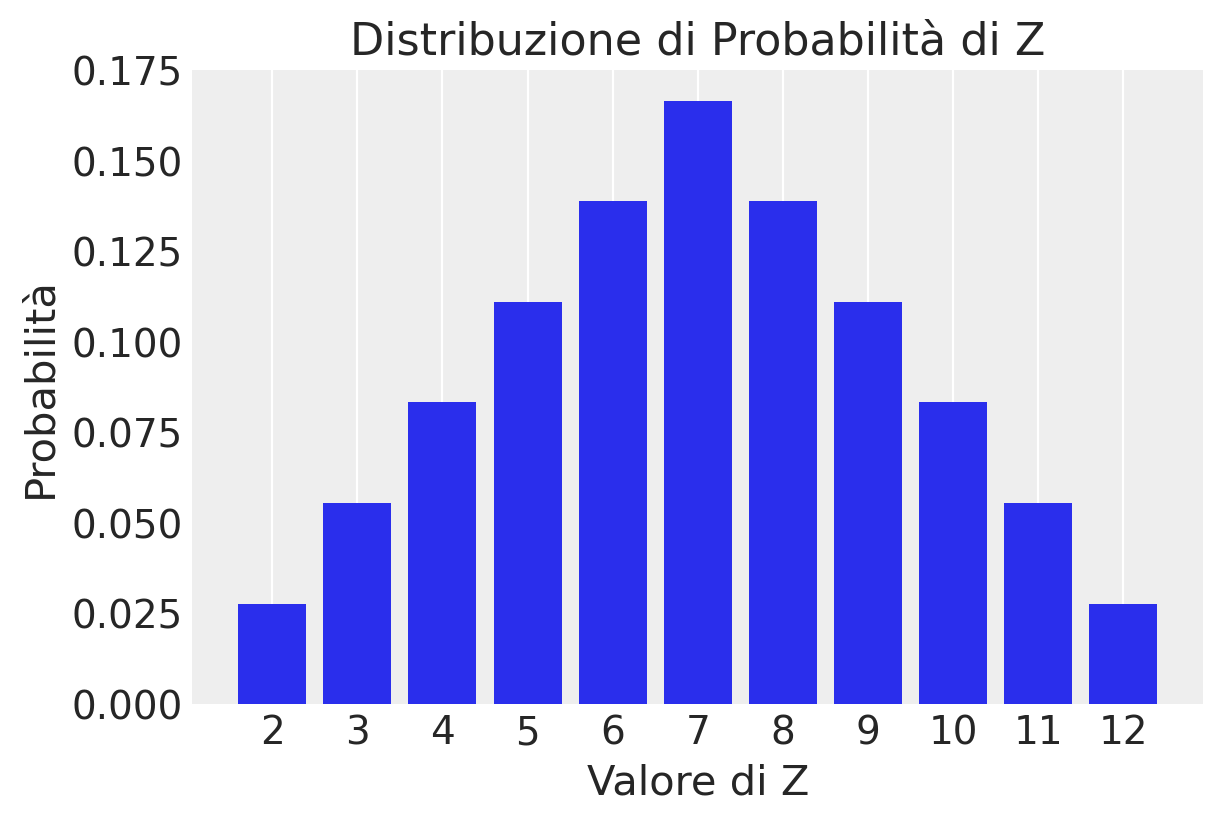

In [16]:
plt.figure(figsize=(6, 4))
plt.bar(df_distribuzione['Valore di Z'], df_distribuzione['Probabilità'])
plt.xlabel('Valore di Z')
plt.ylabel('Probabilità')
plt.title('Distribuzione di Probabilità di Z')
plt.xticks(range(2, 13))  # Per mostrare tutte le etichette sull'asse x
plt.grid(axis='y')
plt.show()

Nel corso di questo esercizio, abbiamo calcolato le probabilità determinando il numero di casi favorevoli, cioè le occorrenze di ogni possibile somma $D_1 + D_2$, all'interno dello spazio campionario dell'esperimento di lancio di due dadi. Queste probabilità si ottengono dividendo il numero di tali occorrenze per il numero totale di combinazioni possibili nello spazio campionario. In termini formali, la probabilità di ogni valore specifico di $ Z $ è indicata come $P_Z(z) = P(Z = z)$, dove $P_Z(z)$ rappresenta "la probabilità che la variabile casuale $Z$ assuma il valore $z$". La funzione che associa a ogni valore $ u $ di $Z$ la probabilità dell'evento $Z = u$ è nota come *funzione di massa di probabilità* della variabile casuale $Z$.

Questa funzione, $ p_Z $, è definita per ciascun valore possibile di $ Z $ come segue:

$$
\begin{array}{rclll}
p_Z(2) & = & 1/36, \\
p_Z(3) & = & 2/36, \\
p_Z(4) & = & 3/36, \\
p_Z(5) & = & 4/36, \\
p_Z(6) & = & 5/36, \\
p_Z(7) & = & 6/36, \\
p_Z(8) & = & 5/36, \\
p_Z(9) & = & 4/36, \\
p_Z(10) & = & 3/36, \\
p_Z(11) & = & 2/36, \\
p_Z(12) & = & 1/36. \\
\end{array}
$$
:::

### Proprietà della funzione di massa di probabilità
Ogni variabile casuale discreta possiede una funzione di massa di probabilità unica che rispetta le seguenti proprietà:

1. La probabilità di ogni evento singolo è compresa tra 0 e 1, ovvero $0 \leq P(Z=z) \leq 1$.
2. La somma delle probabilità di tutti gli eventi possibili è pari a 1, cioè $\sum_{z \in Z} P(Z=z) = 1$.

Se consideriamo un sottoinsieme $A$ della variabile casuale $Z$, la probabilità associata a $A$ dalla distribuzione $P_Z$ è data da:

$$
P_Z(A) = \sum_{z \in A} P(Z = z).
$$

Per esempio, per la variabile casuale $Z$ relativa al lancio di due dadi, la probabilità che $Z$ sia un numero dispari si calcola sommando le probabilità dei valori dispari:

$$
\begin{align}
P(\text{"Z è un numero dispari"}) &= P_Z(3) + P_Z(5) + P_Z(7) + P_Z(9) + P_Z(11) \\
&= \frac{2}{36} + \frac{4}{36} + \frac{6}{36} + \frac{4}{36} + \frac{2}{36} \\
&= \frac{18}{36} \\
&= \frac{1}{2}.
\end{align}
$$

Questa formula ci permette di calcolare la probabilità di qualsiasi sottoinsieme di $ Z $ utilizzando la distribuzione di probabilità $P_Z$.

## Funzione di Distribuzione Cumulativa (CDF)

La **funzione di distribuzione cumulativa** (CDF) descrive come le probabilità si accumulano fino a un certo valore per una variabile casuale. La CDF di una variabile casuale $X$, denotata $F_X(x)$, è definita come la probabilità che $X$ assuma un valore minore o uguale a $x$:

$$
F_X(x) = \mathbb{P}(X \leq x).
$$

In altre parole, $F_X(x)$ ci dice la probabilità totale che la variabile casuale $X$ sia inferiore o uguale a un certo valore $x$.

Una funzione $F$ è una CDF se soddisfa le seguenti tre proprietà:

1. **Non-decrescente**: Intuitivamente, questa proprietà significa che, man mano che ci spostiamo lungo la linea dei numeri reali, la probabilità cumulativa non diminuisce mai. Se $x_1 < x_2$, allora $F(x_1) \leq F(x_2)$. In altre parole, se consideriamo un valore più grande, la probabilità cumulativa può solo restare la stessa o aumentare, mai diminuire.
2. **Normalizzazione**: Questa proprietà assicura che la probabilità totale su tutta la linea dei numeri reali sia corretta. Specificamente, la CDF deve partire da 0 quando ci spostiamo verso l'infinito negativo ($\lim_{x \rightarrow -\infty} F(x) = 0$) e deve arrivare a 1 quando ci spostiamo verso l'infinito positivo ($\lim_{x \rightarrow +\infty} F(x) = 1$). Questo significa che l'intera probabilità è distribuita lungo la linea reale.
3. **Continuità a destra**: Questa proprietà significa che la CDF non salta bruscamente quando ci avviciniamo a un punto da destra. Matematicamente, $F(x) = F(x^+)$ per ogni $x$, dove $F(x^+)$ è il limite della funzione $F$ quando $y$ si avvicina a $x$ da destra. In pratica, questo implica che se ci avviciniamo a un punto specifico da destra, la probabilità cumulativa raggiunge quel punto senza salti improvvisi.

### Funzione di Ripartizione per Variabili Casuali Discrete

Nel contesto delle variabili casuali discrete, la funzione di distribuzione cumulativa viene spesso chiamata **funzione di ripartizione**. Per una variabile casuale discreta $X$, la funzione di ripartizione, denotata $F(x)$, è definita come:

$$
F(x_k) = \mathbb{P}(X \leq x_k) = \sum_{x_i \leq x_k} \mathbb{P}(x_i)
$$

In questa formula, $F(x_k)$ rappresenta la probabilità che la variabile casuale $X$ assuma un valore minore o uguale a $x_k$. La funzione di ripartizione cumula le probabilità dei singoli valori fino a $x_k$.

::: {#exm-4}

Per il caso del lancio di due dadi e la variabile casuale $Z$ definita come la loro somma, la funzione di ripartizione di $Z$ può essere illustrata come segue:

| z   | p(z)   | F(z)     |
| --- | ------ | -------- |
| 2   | 1/36   | 1/36     |
| 3   | 2/36   | 3/36     |
| 4   | 3/36   | 6/36     |
| 5   | 4/36   | 10/36    |
| 6   | 5/36   | 15/36    |
| 7   | 6/36   | 21/36    |
| 8   | 5/36   | 26/36    |
| 9   | 4/36   | 30/36    |
| 10  | 3/36   | 33/36    |
| 11  | 2/36   | 35/36    |
| 12  | 1/36   | 36/36    |

In questa tabella, $F(z)$ rappresenta la funzione di ripartizione cumulativa per ciascun valore $z$. Questo aiuta a comprendere la distribuzione cumulativa delle probabilità per la variabile casuale $Z$ nel contesto del lancio dei due dadi.
:::

#### Trovare la distribuzione di probabilità con una simulazione 

La distribuzione di probabilità che abbiamo precedentemente calcolato per il lancio dei due dadi è corretta, ma esiste un altro metodo per ottenere un risultato molto simile attraverso la simulazione. Questo metodo implica la generazione di un elevato numero di ripetizioni dell'esperimento casuale e l'analisi delle frequenze relative dei risultati ottenuti. In altre parole, simulando l'esperimento numerose volte, possiamo approssimare la distribuzione di probabilità empirica, che si avvicina sempre di più alla distribuzione teorica man mano che il numero di ripetizioni aumenta. Questo approccio è comune in statistica ed è particolarmente utile quando la distribuzione di probabilità teorica non è facilmente calcolabile o è troppo complessa per essere gestita in modo analitico.

::: {#exm-5}

Nel @sec-python-1 abbiamo visto come creare una funzione che ritorna il risultato del lancio di un dado:

In [17]:
def roll_die():
    """
    returns a random int between 1 and 6
    """
    return rng.choice([1, 2, 3, 4, 5, 6])

Possiamo ora definire una funzione che ritorna la somma dei punti prodotti dal lancio di due dadi. La funzione ha come argomento il numero di ripetizioni di questo esperimento casuale.

In [18]:
def roll_two_dice(n):
    """
    returns a random int between 2 and 12
    """
    rolls = []
    for i in range(n):
        two_dice = roll_die() + roll_die()
        rolls.append(two_dice)
    
    return rolls

Eseguiamo 100,000 ripetizioni dell'esperimento casuale e memorizzo i risultati ottenuti.

In [20]:
nrolls = 100000
res = roll_two_dice(nrolls)
print(*res[1:20])

12 10 7 10 7 9 8 7 5 9 8 7 4 9 7 2 10 10 5


Creiamo un DataFrame che contiene la variabile `y` corrispondente ai risultati delle 10,000 ripetizioni dell'esperimento casuale.

In [21]:
df = pd.DataFrame()
df["y"] = res 

Utilizziamo dunque il metodo `value_counts()`, che può essere applicato a un DataFrame, come abbiamo visto nel @sec-freq-distribution, per trovare le frequenze assolute di ciascuno dei possibili risultati dell'esperimento casuale (cioè, 2, 3, ..., 12). Dividendo per il numero totale delle ripetizioni, otterremo una stima empirica della probabilità. Si noti che i risultati saranno simili a quelli teorici ottenuti in precedenza.

In [22]:
abs_freqs = df["y"].value_counts().sort_index()
px = abs_freqs / nrolls
list(zip(list(range(2, 13)), px))

[(2, 0.02775),
 (3, 0.05625),
 (4, 0.08331),
 (5, 0.11109),
 (6, 0.13915),
 (7, 0.16824),
 (8, 0.13751),
 (9, 0.11167),
 (10, 0.08238),
 (11, 0.05567),
 (12, 0.02698)]

:::

## Informazioni sull'Ambiente di Sviluppo

In [19]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Tue May 21 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.22.2

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

scipy     : 1.13.0
arviz     : 0.18.0
matplotlib: 3.8.4
pandas    : 2.2.2
seaborn   : 0.13.2
numpy     : 1.26.4

Watermark: 2.4.3

